In [1]:
import pandas as pd

In [2]:
print ('hello world')

hello world


In [3]:
import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [4]:
import matplotlib.pyplot as plt

In [5]:
np.random.seed(0)
x_test = 2 * math.pi *np.random.uniform(-1, 1, 50000)
y_test = np.array([math.sin(x_test[i]) + math.cos(x_test[i])
                   for i in range (50000)])

In [6]:
# Matrices to store predictions on testing samples for all degrees
y_pred = np.zeros([7, 50000])
y_pred_sq = np.zeros([7, 50000])
degrees = range(1, 8)


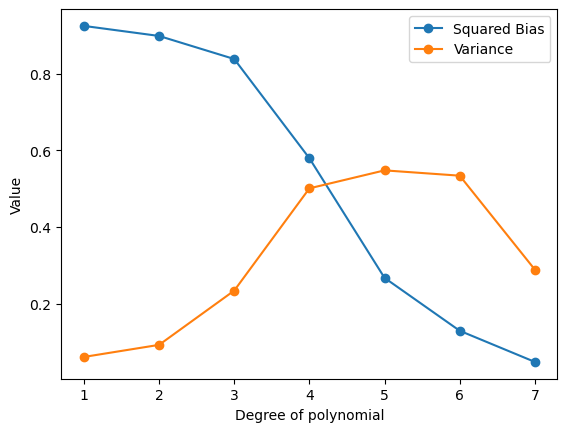

In [7]:

# For each replication:
for i in range(1000):
    # Generate training data
    x_train = 2 * math.pi * np.random.uniform(-1, 1, 30)
    y_train = np.array ([math.sin(x_train[i]) + 
                         math.cos(x_train[i]) for i in range(30)]) 
    + np.random.normal(0, 0.5, 30)
    
# For each polynomial model with degree d
    for d in degrees:
        # Transform the features to polynomial features
        poly_features = PolynomialFeatures(degree=d)
        x_poly_train = poly_features.fit_transform(x_train.reshape(-1, 1))
        x_poly_test = poly_features.fit_transform(x_test.reshape(-1, 1))
        # Fit the model on the training data using the polynomial features
        model = LinearRegression()
        model.fit(x_poly_train, y_train)
        # Calculate predictions on the testing samples
        y_pred_test = model.predict(x_poly_test)
        # Add predictions to current results
        y_pred[d-1] = y_pred[d-1] + y_pred_test
        y_pred_sq[d-1] = y_pred_sq[d-1] + y_pred_test**2
y_pred = y_pred / 1000
y_pred_sq = y_pred_sq / 1000

sq_bias =[]
variance = []
for d in degrees:
    # Calculate bias ^2 and vaiance, average over 50000 testing samples
    sq_bias. append (sum ((y_pred [d-1] - y_test)**2) / 50000)
    variance. append (sum(y_pred_sq[d-1] - y_pred[d-1]**2) / 50000)

import matplotlib.pyplot as plt
plt.plot (degrees, sq_bias, 'o-', label='Squared Bias')
plt.plot (degrees, variance, 'o-', label='Variance')
plt.legend()
plt.xlabel ('Degree of polynomial')
plt. ylabel ('Value')
plt.show()
